# Developing a model for predicting F1 score for `Grooming`

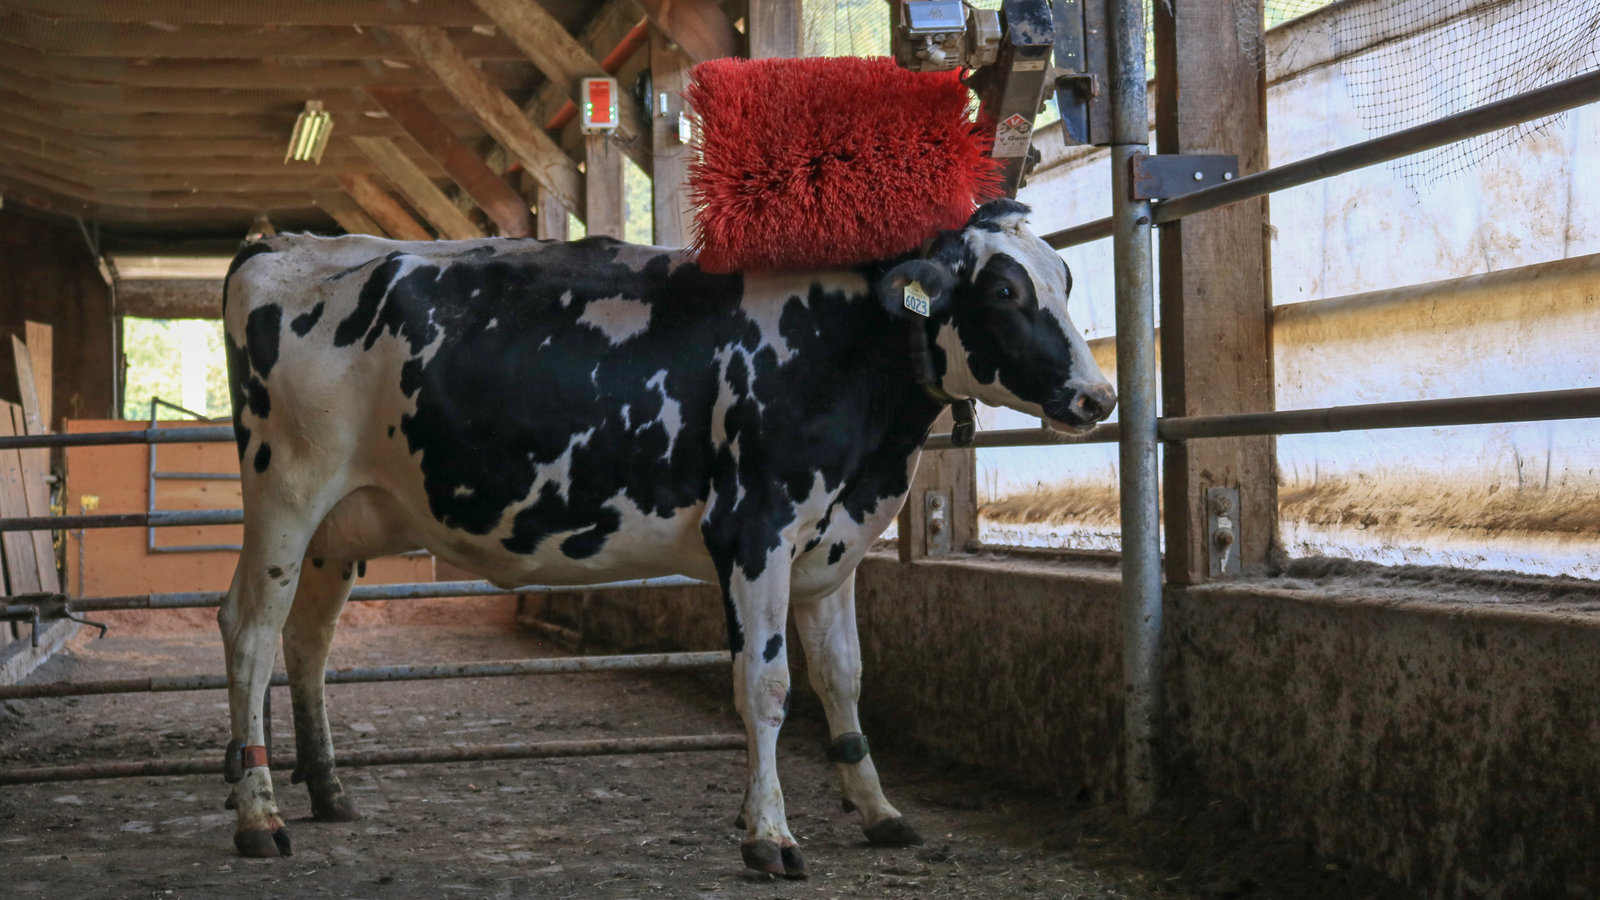

In [26]:
Image("09TB-COWBRUSH-videoSixteenByNineJumbo1600.png")

**Building model for `Grooming` activities which can predict F1 score**

In [2]:
#Imoprting tools we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

%matplotlib inline

In [3]:
#Importing dataset
df = pd.read_csv("G8_train.csv")

In [4]:
df

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628308060,-0.196777,0.966309,0.152344,-7.324219,11.047363,2.441406,33.0,1435.5,403.5,8
1,1628308060,-0.187500,0.956543,0.143066,-6.103516,12.145996,2.258301,34.5,1429.5,396.0,8
2,1628308060,-0.181641,0.943848,0.149414,-6.042480,12.573242,1.708984,22.5,1413.0,378.0,8
3,1628308060,-0.188477,0.949219,0.163086,-4.821777,13.000488,2.563477,37.5,1417.5,415.5,8
4,1628308060,-0.207031,0.947266,0.165039,-2.624512,13.610840,2.685547,43.5,1422.0,396.0,8
...,...,...,...,...,...,...,...,...,...,...,...
368602,1628396807,-0.155762,0.955566,0.208496,-5.737305,5.981445,-2.319336,-684.0,1068.0,297.0,8
368603,1628396807,-0.162109,0.945313,0.215332,-3.784180,3.234863,-2.502441,-670.5,1081.5,255.0,8
368604,1628396807,-0.171875,0.928223,0.216797,-4.699707,3.356934,-0.976563,-651.0,1083.0,274.5,8
368605,1628396807,-0.178223,0.938965,0.208008,-2.075195,2.380371,-1.953125,-676.5,1075.5,268.5,8


In [5]:
df.isna().sum()

time     0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

In [6]:
df.dtypes

time       int64
acc_x    float64
acc_y    float64
acc_z    float64
gyr_x    float64
gyr_y    float64
gyr_z    float64
mag_x    float64
mag_y    float64
mag_z    float64
label      int64
dtype: object

In [7]:
df.describe()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
count,3.686070e+05,368607.000000,368607.000000,368607.000000,368607.000000,368607.000000,368607.000000,368607.000000,368607.000000,368607.000000,368607.0
mean,1.628324e+09,-0.063583,0.744358,0.134306,0.568379,-1.590989,-0.743710,-203.987096,800.726737,251.841180,8.0
std,8.925358e+04,0.264542,0.580712,0.205106,20.524211,27.714400,17.309965,182.945025,653.804407,364.209277,0.0
min,1.628070e+09,-5.166016,-4.437012,-15.983398,-543.640137,-972.167969,-324.584961,-910.500000,-700.500000,-862.500000,8.0
25%,1.628314e+09,-0.223633,0.850098,0.051758,-6.042480,-11.718750,-7.446289,-310.500000,69.000000,195.000000,8.0
50%,1.628320e+09,-0.078613,0.942383,0.137695,0.488281,-1.892090,-0.549316,-184.500000,1222.500000,319.500000,8.0
75%,1.628399e+09,0.075195,0.989746,0.225586,6.774902,8.239746,6.164551,-82.500000,1368.000000,525.000000,8.0
max,1.628421e+09,3.219727,4.967285,15.523438,1142.395019,1068.542480,564.392090,439.500000,1558.500000,931.500000,8.0


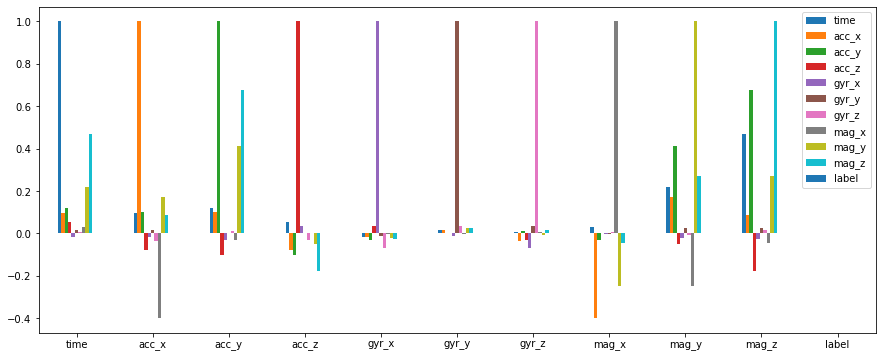

In [9]:
df.corr().plot(kind="bar",
              figsize=(15,6))
plt.xticks(rotation=0);

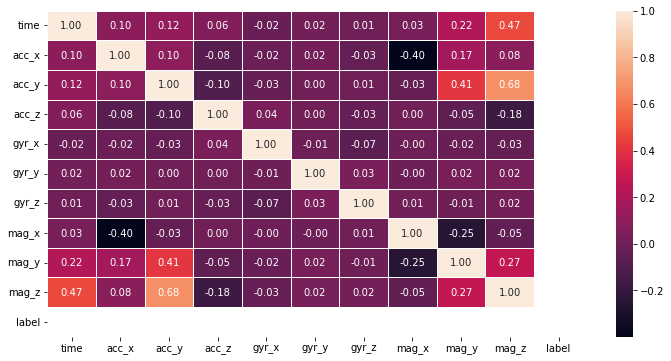

In [10]:
corr_mat =df.corr()
fig,ax =plt.subplots(figsize=(12,6))
ax=sns.heatmap(corr_mat,
              annot=True,
              linewidths=0.5,
              fmt=".2f")

In [11]:
#Importing train ,test and split from sklearn model selaction module
from sklearn.model_selection import train_test_split

#Creating X & y label
X= df.drop("label",axis=1)
y= df["label"]

#Spilliting data into traning and testing 
X_train ,X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)




In [12]:
X_train

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
117767,1628337277,-0.045410,1.017578,-0.007324,19.165039,-16.357422,28.076172,-217.5,1366.5,618.0
367564,1628396781,-0.270508,0.997559,0.118652,-18.615723,43.090820,11.779785,-486.0,913.5,591.0
64987,1628319701,-0.185059,1.000976,0.128906,-1.220703,-3.906250,16.296387,-180.0,1345.5,232.5
92025,1628331695,0.379395,1.086914,-0.136719,19.226074,-16.113281,-40.466309,-328.5,1375.5,526.5
279614,1628394134,-0.311524,0.965332,0.114746,-3.295898,-3.967285,-0.366211,22.5,-121.5,609.0
...,...,...,...,...,...,...,...,...,...,...
148019,1628404157,0.177734,0.918457,-0.046875,-26.000977,2.685547,5.004883,-480.0,1327.5,445.5
77264,1628319956,0.018555,1.021973,0.069336,-4.455566,1.159668,-1.770020,-166.5,1338.0,297.0
159372,1628404681,0.534180,0.657715,0.269531,6.347656,1.953125,2.258301,-342.0,1228.5,156.0
154886,1628404300,-0.064453,1.097656,-0.128906,26.550293,-45.166016,8.483887,-346.5,1381.5,552.0


In [13]:
y_train

117767    8
367564    8
64987     8
92025     8
279614    8
         ..
148019    8
77264     8
159372    8
154886    8
214909    8
Name: label, Length: 294885, dtype: int64

In [14]:
X_test

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
42432,1628318741,0.046875,1.118652,0.035645,-4.516602,5.859375,-4.821777,-180.0,1362.0,297.0
81737,1628320107,-0.039062,0.934570,0.171875,-0.549316,7.507324,3.051758,-292.5,1344.0,286.5
72932,1628319866,-0.158691,0.912109,0.156250,6.896973,12.145996,2.563477,-178.5,1368.0,211.5
251101,1628398807,-0.236816,-0.904785,0.436035,0.122070,-26.000977,-10.742188,-369.0,-103.5,-694.5
238919,1628329807,-0.157227,-0.935547,0.113769,20.263672,-1.770020,10.498047,-7.5,82.5,-448.5
...,...,...,...,...,...,...,...,...,...,...
364909,1628396716,0.015625,0.720215,0.610840,6.835938,-19.165039,-9.704590,-720.0,1017.0,366.0
17612,1628314296,0.188965,0.930664,0.342285,3.662109,-16.113281,-18.493652,-150.0,1410.0,246.0
282014,1628398476,-0.223144,0.981934,0.127441,1.281738,-7.934570,-3.051758,-64.5,-129.0,541.5
96142,1628332008,-0.016602,1.067383,0.066894,-8.117676,-7.507324,-9.460449,-318.0,1429.5,352.5


In [15]:
y_test

42432     8
81737     8
72932     8
251101    8
238919    8
         ..
364909    8
17612     8
282014    8
96142     8
207328    8
Name: label, Length: 73722, dtype: int64

In [16]:
#Importing Randomforestregressor from sklearn ensemble module
from sklearn.ensemble import RandomForestRegressor

clf=RandomForestRegressor()

In [17]:
#Fitting model into traning and testing
clf.fit(X_train,y_train)

RandomForestRegressor()

In [18]:
clf.fit(X_test,y_test)

RandomForestRegressor()

In [19]:
clf.score(X_test,y_test)

1.0

In [20]:
clf.score(X_train,y_train)

1.0

In [21]:
y_pred=clf.predict(X_test)

In [22]:
y_pred

array([8., 8., 8., ..., 8., 8., 8.])

In [24]:
#Classification reports
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           8       1.00      1.00      1.00     73722

    accuracy                           1.00     73722
   macro avg       1.00      1.00      1.00     73722
weighted avg       1.00      1.00      1.00     73722



In [25]:
#F1 score
from sklearn.metrics import f1_score

f1_score(y_test,y_pred,average="weighted")

1.0